In [187]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [163]:
insurance_data = pd.read_csv("D:/dataset/insurance.csv")

In [164]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,Premium
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


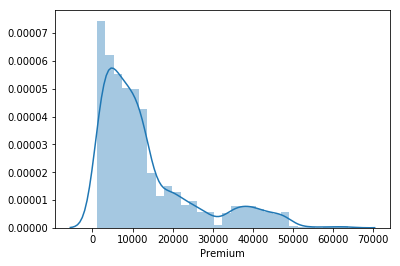

In [106]:
sns.distplot(insurance_data["Premium"])

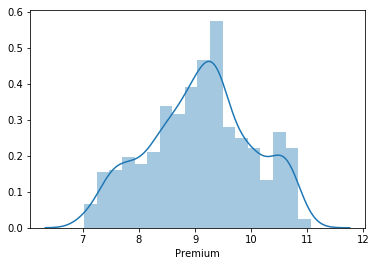

In [107]:
sns.distplot(np.log(insurance_data["Premium"]))

In [165]:
insurance_data["Premium"]=np.log(insurance_data["Premium"])

In [109]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,Premium
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [110]:
insurance_data.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
Premium     0
dtype: int64

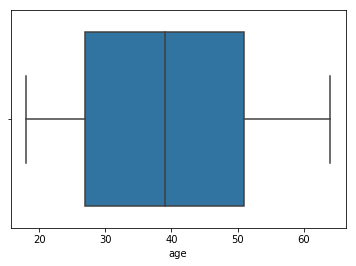

In [111]:
sns.boxplot(insurance_data["age"])

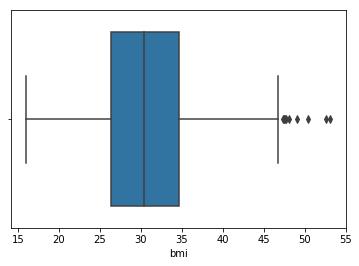

In [112]:
sns.boxplot(insurance_data["bmi"])

In [113]:
insurance_data.corr()

,age,bmi,children,Premium
age,1.000000,0.109272,0.042469,0.527834
bmi,0.109272,1.000000,0.012759,0.132669
children,0.042469,0.012759,1.000000,0.161336
Premium,0.527834,0.132669,0.161336,1.000000


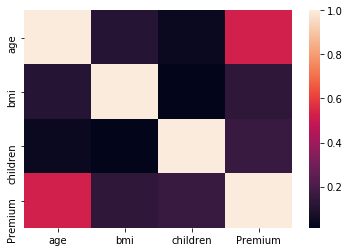

In [114]:
sns.heatmap(insurance_data.corr())

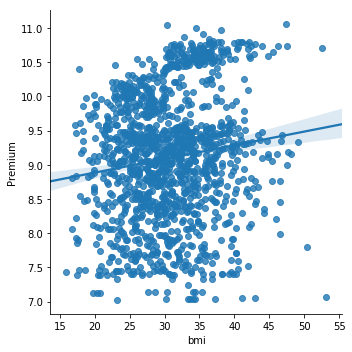

In [115]:
sns.lmplot('bmi','Premium',data=insurance_data)

In [1]:
q1, q3= np.percentile(insurance_data["bmi"],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print(lower_bound,upper_bound)


NameError: name 'np' is not defined

In [116]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
Premium     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [166]:
insurance_data["children"] = insurance_data["children"].astype("category")

In [167]:
insurance_data["bmi_category"]=0

In [168]:
#Convert BMI to category
bins = [0, 25, 30,np.inf]
names = ['Normal', 'Overweight', 'Obesse']
insurance_data["bmi_category"] = pd.cut(insurance_data['bmi'], bins, labels=names)

In [169]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,Premium,bmi_category
0,19,female,27.900,0,yes,southwest,9.734176,Overweight
1,18,male,33.770,1,no,southeast,7.453302,Obesse
2,28,male,33.000,3,no,southeast,8.400538,Obesse
3,33,male,22.705,0,no,northwest,9.998092,Normal
4,32,male,28.880,0,no,northwest,8.260197,Overweight


In [170]:
insurance_data=insurance_data.drop('bmi',axis=1)

In [171]:
insurance_data = pd.get_dummies(insurance_data,drop_first=True)

In [125]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
    Convert categorical variable into dummy/indicator variables
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
    prefix : string, list of strings, or dict of strings, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : string, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix.`
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the DataFrame to be encoded.
        

In [172]:
insurance_data.head()

,age,Premium,gender_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_category_Overweight,bmi_category_Obesse
0,19,9.734176,0,0,0,0,0,0,1,0,0,1,1,0
1,18,7.453302,1,1,0,0,0,0,0,0,1,0,0,1
2,28,8.400538,1,0,0,1,0,0,0,0,1,0,0,1
3,33,9.998092,1,0,0,0,0,0,0,1,0,0,0,0
4,32,8.260197,1,0,0,0,0,0,0,1,0,0,1,0


In [173]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [174]:
feature = insurance_data.loc[:,insurance_data.columns!="Premium"]

In [175]:
target = insurance_data["Premium"]

In [176]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.3,random_state=42)

In [177]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

In [178]:
x_train.shape

(936, 13)

In [179]:
x_test.shape

(402, 13)

In [180]:
936/1338

0.6995515695067265

In [181]:
x_train = sm.add_constant(x_train)

In [182]:
x_train.head()

,const,age,gender_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_category_Overweight,bmi_category_Obesse
332,1.0,61,0,0,0,0,0,0,0,1,0,0,0,1
355,1.0,46,1,0,0,0,0,0,0,0,0,1,1,0
138,1.0,54,0,0,0,1,0,0,0,0,1,0,0,1
381,1.0,55,1,0,0,0,0,0,1,0,0,0,0,1
292,1.0,25,1,0,1,0,0,0,1,0,1,0,0,1


In [183]:
x_test = sm.add_constant(x_test)

In [184]:
x_test.head()

,const,age,gender_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_category_Overweight,bmi_category_Obesse
764,1.0,45,0,0,1,0,0,0,0,0,0,0,1,0
887,1.0,36,0,0,0,0,0,0,0,1,0,0,0,1
890,1.0,64,0,0,0,0,0,0,1,1,0,0,1,0
1293,1.0,46,1,0,0,1,0,0,0,1,0,0,1,0
259,1.0,19,1,0,0,0,0,0,1,1,0,0,0,1


In [185]:
model = sm.OLS(y_train,x_train).fit()

In [186]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     231.0
Date:                Sat, 08 Jun 2019   Prob (F-statistic):          3.38e-279
Time:                        10:52:50   Log-Likelihood:                -572.85
No. Observations:                 936   AIC:                             1174.
Df Residuals:                     922   BIC:                             1241.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [45]:
#Another way to implement Linear Regression using Scikit Learn
lm_obj=LinearRegression()

In [46]:
lm_obj.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
x_train.columns

Index(['const', 'age', 'bmi', 'children', 'gender_female', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast'],
      dtype='object')

In [53]:
help(lm_obj)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, 

In [54]:
lm_obj.coef_

array([     0.        ,    261.29692414,    348.90691516,    424.11912829,
         -104.81182299, -23628.36722236,    926.32290791,    439.38829744,
          -44.64593066])

In [50]:
lm_obj.intercept_

10432.892234400919

In [197]:
predict1 = model.predict(x_test)

In [198]:
predict1.head()

764      9.189155
887      8.683264
890     11.065259
1293     9.008175
259      9.574390
dtype: float64

In [199]:
y_test.head()

764      9.115488
887      8.570198
890     10.286400
1293     9.137973
259     10.426744
Name: Premium, dtype: float64

In [190]:
from statsmodels.tools.eval_measures import rmse

In [191]:
rmse = rmse(y_test, predict)

In [192]:
rmse

0.42573379527655264

In [193]:
from sklearn.metrics import mean_squared_error

In [194]:
np.sqrt(mean_squared_error(y_test,predict))

0.42573379527655264

In [195]:
np.exp(np.sqrt(mean_squared_error(y_test,predict)))

1.5307132377973272

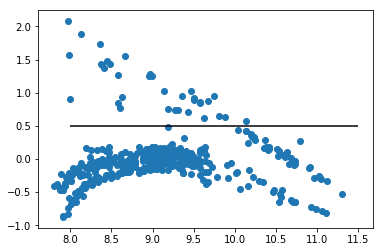

In [211]:
#Testing of error should be normally distributed
residual=y_test-predict1
residual = pd.Series(residual)
plt.scatter(predict1,residual)
#plt.hist(y_test-predict1)
plt.hlines(0.5,8,11.5)

In [214]:
residual.head()

764    -0.073667
887    -0.113065
890    -0.778859
1293    0.129799
259     0.852355
dtype: float64

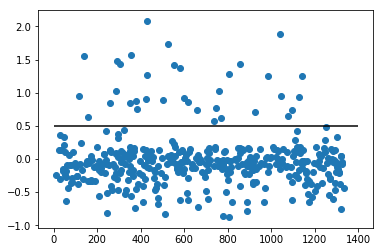

In [216]:
#No Autoserial corelation
plt.scatter(residual.index,residual.values)
plt.hlines(0.5,0,1400)

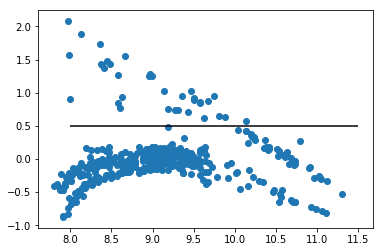

In [217]:
#Checking heteroscedasticity of error
plt.scatter(predict1,residual)
#plt.hist(y_test-predict1)
plt.hlines(0.5,8,11.5)

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [220]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature.columns

In [221]:
vif

,VIF Factor,features
0,5.341981,age
1,1.932029,gender_male
2,1.516250,children_1
3,1.383038,children_2
4,1.267962,children_3
5,1.046992,children_4
6,1.032935,children_5
7,1.258381,smoker_yes
8,1.794780,region_northwest
9,2.008884,region_southeast


In [36]:
insurance_data_new.columns!="Premium"

array([ True,  True,  True, False,  True,  True,  True,  True,  True])